In [1]:
from typing import Callable

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import layers, models
from keras.optimizers import SGD
from keras.callbacks import History
from keras.optimizers.schedules.learning_rate_schedule import ExponentialDecay
from sklearn.model_selection import train_test_split

2023-04-06 14:26:48.862890: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-06 14:26:49.541854: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-06 14:26:49.541905: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-06 14:26:52.387901: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
def target(value: np.ndarray) -> float:
    x, y = value
    return (y + 1)**2 + 5 * np.sin(x)

In [3]:
def plot_2d(f: Callable[[np.ndarray], float]) -> None:
    x = np.linspace(1, 10, 100)
    y = np.linspace(1, 10, 100)
    X, Y = np.meshgrid(x, y)
    Z = f(np.array([X, Y]))

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')
    plt.show()

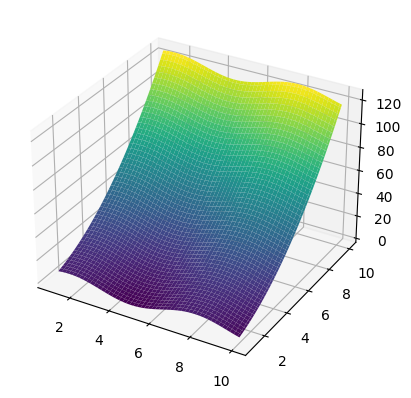

In [4]:
plot_2d(target)

In [5]:
X = np.random.random(size=(2000, 2)) * 10
Y = np.array(list(map(target, X)))

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [7]:
def compile_model(model: models.Sequential) -> None:
    model.compile(
        loss="mean_absolute_error",
        optimizer=SGD(learning_rate=ExponentialDecay(initial_learning_rate=0.001, decay_steps=75, decay_rate=0.96)),
        metrics=["mean_absolute_error"],
    )

In [8]:
def plot_history(hist: History) -> None:
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

## Feed forward backprop - 10 neurons

In [9]:
model1 = models.Sequential(
    layers=[
        layers.Dense(10, activation=tf.nn.relu, input_shape=(2,)),
        layers.Dense(1),
    ]
)

compile_model(model1)

2023-04-06 14:28:16.793999: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-06 14:28:16.794290: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-06 14:28:16.794323: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kinfi4-laptop): /proc/driver/nvidia/version does not exist
2023-04-06 14:28:16.795668: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
model1.summary()

In [ ]:
history = model1.fit(x_train, y_train, epochs=250, validation_data=(x_test, y_test))

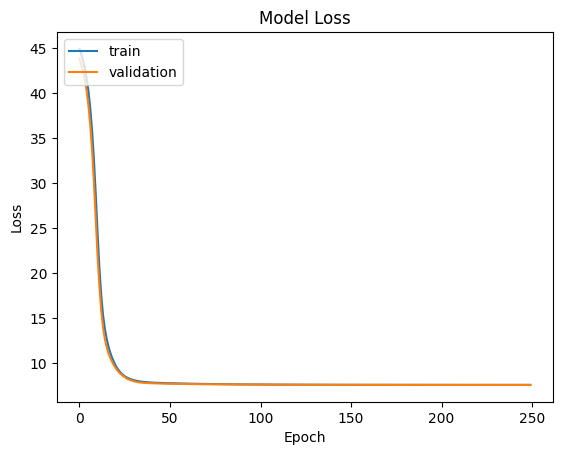

In [481]:
plot_history(history)

## Feed forward backprop - 20 neurons

In [472]:
model2 = models.Sequential(
    layers=[
        layers.Dense(20, activation=tf.nn.relu, input_shape=(2,)),
        layers.Dense(1),
    ]
)

compile_model(model2)

In [473]:
model2.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 20)                60        
                                                                 
 dense_109 (Dense)           (None, 1)                 21        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [474]:
history = model2.fit(x_train, y_train, epochs=250, validation_data=(x_test, y_test))

Epoch 1/250
50/50 [==============================] - 1s 6ms/step - loss: 46.3808 - mean_absolute_error: 46.3808 - val_loss: 44.3696 - val_mean_absolute_error: 44.3696
Epoch 2/250
50/50 [==============================] - 0s 3ms/step - loss: 44.1326 - mean_absolute_error: 44.1326 - val_loss: 42.1296 - val_mean_absolute_error: 42.1296
Epoch 3/250
50/50 [==============================] - 0s 3ms/step - loss: 41.8209 - mean_absolute_error: 41.8209 - val_loss: 39.7479 - val_mean_absolute_error: 39.7479
Epoch 4/250
50/50 [==============================] - 0s 4ms/step - loss: 39.2955 - mean_absolute_error: 39.2955 - val_loss: 37.1030 - val_mean_absolute_error: 37.1030
Epoch 5/250
50/50 [==============================] - 0s 4ms/step - loss: 36.5068 - mean_absolute_error: 36.5068 - val_loss: 34.1981 - val_mean_absolute_error: 34.1981
Epoch 6/250
50/50 [==============================] - 0s 3ms/step - loss: 33.5275 - mean_absolute_error: 33.5275 - val_loss: 31.1649 - val_mean_absolute_error: 31.164

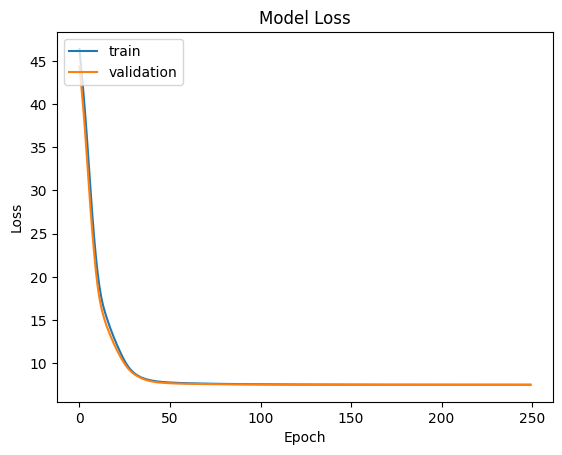

In [475]:
plot_history(history)

## Cascade forward backprop 20 neurons

In [476]:
input_layer = layers.Input(shape=(2,))
first_layer = layers.Dense(20, activation=tf.nn.relu)(input_layer)
outputs = layers.Dense(1)(layers.concatenate([input_layer, first_layer]))

model3 = models.Model(input_layer, outputs)

compile_model(model3)

In [477]:
model3.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense_110 (Dense)              (None, 20)           60          ['input_8[0][0]']                
                                                                                                  
 concatenate_8 (Concatenate)    (None, 22)           0           ['input_8[0][0]',                
                                                                  'dense_110[0][0]']              
                                                                                                  
 dense_111 (Dense)              (None, 1)            23          ['concatenate_8[0][0]']    

In [439]:
history = model3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=250)

Epoch 1/250
50/50 [==============================] - 1s 5ms/step - loss: 46.4510 - mean_absolute_error: 46.4510 - val_loss: 42.7219 - val_mean_absolute_error: 42.7219
Epoch 2/250
50/50 [==============================] - 0s 2ms/step - loss: 43.0160 - mean_absolute_error: 43.0160 - val_loss: 39.2942 - val_mean_absolute_error: 39.2942
Epoch 3/250
50/50 [==============================] - 0s 2ms/step - loss: 39.5697 - mean_absolute_error: 39.5697 - val_loss: 35.8570 - val_mean_absolute_error: 35.8570
Epoch 4/250
50/50 [==============================] - 0s 2ms/step - loss: 36.1030 - mean_absolute_error: 36.1030 - val_loss: 32.5692 - val_mean_absolute_error: 32.5692
Epoch 5/250
50/50 [==============================] - 0s 2ms/step - loss: 32.8894 - mean_absolute_error: 32.8894 - val_loss: 29.4462 - val_mean_absolute_error: 29.4462
Epoch 6/250
50/50 [==============================] - 0s 2ms/step - loss: 29.9230 - mean_absolute_error: 29.9230 - val_loss: 26.5463 - val_mean_absolute_error: 26.546

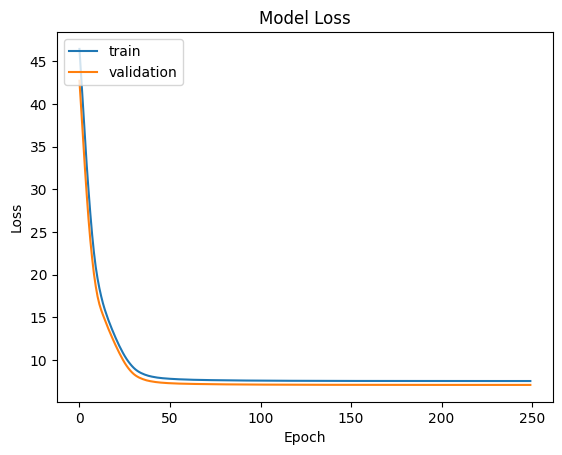

In [440]:
plot_history(history)

## Cascade forward backprop 2 layers for 10 neurons

In [441]:
input_layer = layers.Input(shape=(2,))
first_layer = layers.Dense(10, activation=tf.nn.relu)(input_layer)
second_layer = layers.Dense(10, activation=tf.nn.relu)(layers.concatenate([input_layer, first_layer]))

outputs = layers.Dense(1)(layers.concatenate([input_layer, first_layer, second_layer]))

model4 = models.Model(input_layer, outputs)

compile_model(model4)

In [442]:
model4.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense_100 (Dense)              (None, 10)           30          ['input_7[0][0]']                
                                                                                                  
 concatenate_6 (Concatenate)    (None, 12)           0           ['input_7[0][0]',                
                                                                  'dense_100[0][0]']              
                                                                                                  
 dense_101 (Dense)              (None, 10)           130         ['concatenate_6[0][0]']    

In [443]:
history = model4.fit(x_train, y_train, epochs=250, validation_data=(x_test, y_test))

Epoch 1/250
50/50 [==============================] - 1s 5ms/step - loss: 42.8728 - mean_absolute_error: 42.8728 - val_loss: 39.3970 - val_mean_absolute_error: 39.3970
Epoch 2/250
50/50 [==============================] - 0s 2ms/step - loss: 39.9580 - mean_absolute_error: 39.9580 - val_loss: 36.5006 - val_mean_absolute_error: 36.5006
Epoch 3/250
50/50 [==============================] - 0s 2ms/step - loss: 37.0041 - mean_absolute_error: 37.0041 - val_loss: 33.6484 - val_mean_absolute_error: 33.6484
Epoch 4/250
50/50 [==============================] - 0s 2ms/step - loss: 34.0913 - mean_absolute_error: 34.0913 - val_loss: 30.7089 - val_mean_absolute_error: 30.7089
Epoch 5/250
50/50 [==============================] - 0s 2ms/step - loss: 31.1280 - mean_absolute_error: 31.1280 - val_loss: 27.6757 - val_mean_absolute_error: 27.6757
Epoch 6/250
50/50 [==============================] - 0s 2ms/step - loss: 28.0703 - mean_absolute_error: 28.0703 - val_loss: 24.6534 - val_mean_absolute_error: 24.653

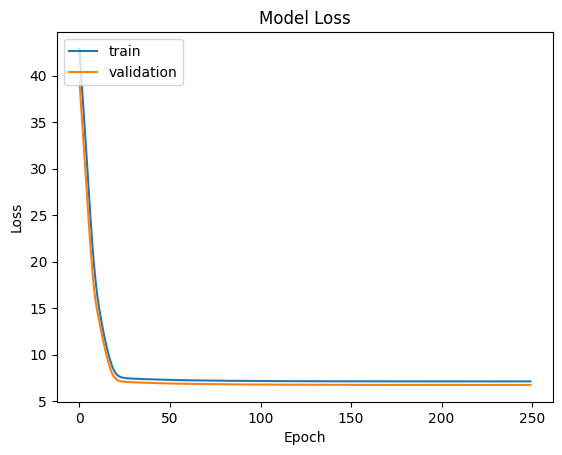

In [444]:
plot_history(history)

## Elman backprop: 1 layer with 15 neurons

In [462]:
model5 = models.Sequential(
    layers=[
        layers.SimpleRNN(15, activation=tf.nn.relu, input_shape=(1, 2)),
        layers.Dense(1),
    ]
)

compile_model(model5)

In [463]:
model5.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 15)                270       
                                                                 
 dense_104 (Dense)           (None, 1)                 16        
                                                                 
Total params: 286
Trainable params: 286
Non-trainable params: 0
_________________________________________________________________


In [464]:
x_train_rnn = np.reshape(x_train, (x_train.shape[0], 1, 2))
x_test_rnn = np.reshape(x_test, (x_test.shape[0], 1, 2))

In [465]:
history = model5.fit(x_train_rnn, y_train, epochs=250, validation_data=(x_test_rnn, y_test))

Epoch 1/250
50/50 [==============================] - 1s 9ms/step - loss: 41.2026 - mean_absolute_error: 41.2026 - val_loss: 38.9519 - val_mean_absolute_error: 38.9519
Epoch 2/250
50/50 [==============================] - 0s 3ms/step - loss: 38.4053 - mean_absolute_error: 38.4053 - val_loss: 36.1341 - val_mean_absolute_error: 36.1341
Epoch 3/250
50/50 [==============================] - 0s 3ms/step - loss: 35.5060 - mean_absolute_error: 35.5060 - val_loss: 33.1340 - val_mean_absolute_error: 33.1340
Epoch 4/250
50/50 [==============================] - 0s 3ms/step - loss: 32.4057 - mean_absolute_error: 32.4057 - val_loss: 29.9806 - val_mean_absolute_error: 29.9806
Epoch 5/250
50/50 [==============================] - 0s 3ms/step - loss: 29.2121 - mean_absolute_error: 29.2121 - val_loss: 26.9230 - val_mean_absolute_error: 26.9230
Epoch 6/250
50/50 [==============================] - 0s 3ms/step - loss: 26.1861 - mean_absolute_error: 26.1861 - val_loss: 24.1276 - val_mean_absolute_error: 24.127

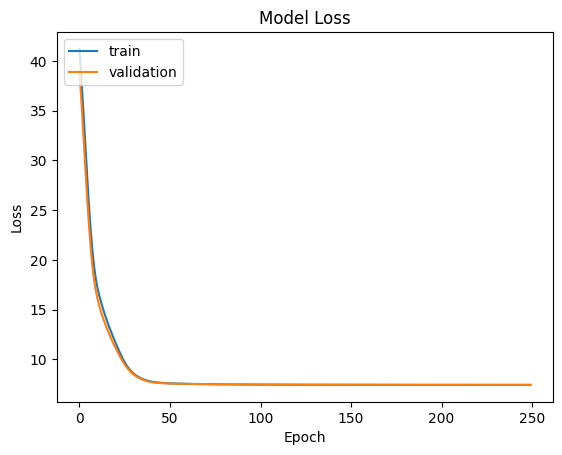

In [466]:
plot_history(history)

## Elman backprop: 3 layer with 5 neurons

In [467]:
model6 = models.Sequential(
    layers=[
        layers.SimpleRNN(5, activation=tf.nn.relu, input_shape=(1, 2)),
        layers.Dense(5, activation=tf.nn.relu),
        layers.Dense(5, activation=tf.nn.relu),
        layers.Dense(1),
    ]
)

compile_model(model6)

In [468]:
model6.summary()

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 5)                 40        
                                                                 
 dense_105 (Dense)           (None, 5)                 30        
                                                                 
 dense_106 (Dense)           (None, 5)                 30        
                                                                 
 dense_107 (Dense)           (None, 1)                 6         
                                                                 
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________


In [469]:
history = model6.fit(x_train_rnn, y_train, epochs=250, validation_data=(x_test_rnn, y_test))

Epoch 1/250
50/50 [==============================] - 1s 8ms/step - loss: 44.9628 - mean_absolute_error: 44.9628 - val_loss: 43.9017 - val_mean_absolute_error: 43.9017
Epoch 2/250
50/50 [==============================] - 0s 3ms/step - loss: 44.5560 - mean_absolute_error: 44.5560 - val_loss: 43.3576 - val_mean_absolute_error: 43.3576
Epoch 3/250
50/50 [==============================] - 0s 3ms/step - loss: 43.8222 - mean_absolute_error: 43.8222 - val_loss: 42.3574 - val_mean_absolute_error: 42.3574
Epoch 4/250
50/50 [==============================] - 0s 3ms/step - loss: 42.5200 - mean_absolute_error: 42.5200 - val_loss: 40.6188 - val_mean_absolute_error: 40.6188
Epoch 5/250
50/50 [==============================] - 0s 3ms/step - loss: 40.4054 - mean_absolute_error: 40.4054 - val_loss: 37.9339 - val_mean_absolute_error: 37.9339
Epoch 6/250
50/50 [==============================] - 0s 3ms/step - loss: 37.2918 - mean_absolute_error: 37.2918 - val_loss: 34.3698 - val_mean_absolute_error: 34.369

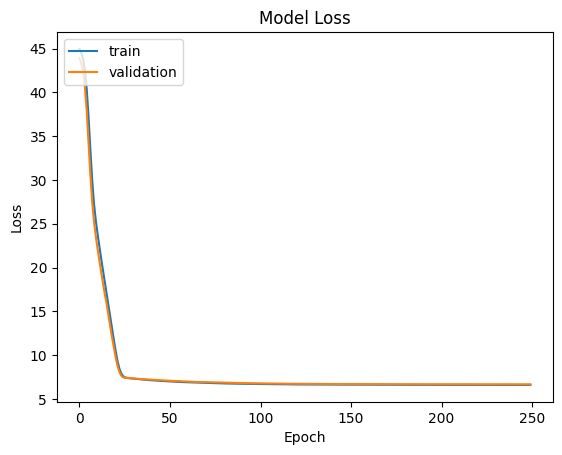

In [470]:
plot_history(history)